In [1]:
# 导入matplotlib、basemap
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import pymongo
%matplotlib inline

In [2]:
# 得到原始地图，可通过参数限制展现范围
def get_base_map(fig,llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90):
    width=urcrnrlon-llcrnrlon
    height=urcrnrlat-llcrnrlat
    ax=fig.add_subplot(111)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
    plt.margins(0,0)
    #指定WGS84格式，与后期读入的经纬度数据匹配     
    m = Basemap(llcrnrlon,llcrnrlat,urcrnrlon,urcrnrlat,ellps='WGS84')
    m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 1500, verbose= True)
    return ax,m
# 将最大风速映射为不同颜色和缩放程度
def from_speed_to_color(speed):
    if speed<=40:
        color='b'
        zoom=0.6
    elif speed<=70:
        color='c'
        zoom=1
    elif speed<=100:
        color='y'
        zoom=2
    elif speed<=130:
        color='m'
        zoom=3
    else:
        color='r'
        zoom=4
    return color,zoom
# client = pymongo.MongoClient(host='localhost', port=27017)
# db = client.earth_2000
# collection=db.map
# collection.drop()

In [51]:
import os
import json
top_path='datas/'
data_paths_dicts={}
for i in range(1851,2018):
    data_paths_dicts[str(i)]=[]
for dirpath, dirname, filename in os.walk(top_path):
    if filename:
        for file in filename:
            file_year=file[4:8]
#             print(file_year)
            data_paths_dicts[file_year].append(dirpath + '/' + file)
# print(data_paths_dicts['1851'])
datas=[]
for i in range(1851,2018):
    data_of_year=[]
    path_of_year=data_paths_dicts[str(i)]
    min_latitudes=[]
    max_latitudes=[]
    min_longitudes=[]
    max_longitudes=[]
    for data_path in path_of_year:
        with open(data_path,'r',encoding='utf-8') as f:
            data=json.load(f)
            min_latitudes.append(min(data['Latitude']))
            max_latitudes.append(max(data['Latitude']))
            min_longitudes.append(min(data['Longitude']))
            max_longitudes.append(max(data['Longitude']))
            data_of_year.append(data)
    min_latitude=min(min_latitudes)-5
    if min_latitude<-90:
        min_latitude=-90
    max_latitude=max(max_latitudes)+5
    if max_latitude>90:
        max_latitude=90
    min_longitude=min(min_longitudes)-5
    if min_longitude<-180:
        min_longitude=-180
    max_longitude=max(max_longitudes)+5
    if max_longitude>180:
        max_longitude=180
    datas.append(data_of_year)
#     print(min_latitude,max_latitude,min_longitude,max_longitude)
    m=get_base_map(min_longitude,min_latitude,max_longitude,max_latitude)
    count=0
    for data in data_of_year:
        count+=1
        latitudes=data['Latitude']
        longitudes=data['Longitude']
        speeds=data["Maximum_sustained_wind"]
        colors=[from_speed_to_color(i) for i in speeds]
        m.plot(longitudes[0],latitudes[0],colors[0],marker='D',markersize=6)
        plt.text(longitudes[0]+0.2, latitudes[0]+0.2, '{}'.format(count),fontsize=20,fontweight='bold',ha='left',va='bottom',color='w')
        for j in range(len(latitudes)-1):
#             m.plot(longitudes[i],latitudes[i],colors[i],marker='o',markersize=8
#             col=colors[i]
            plt.annotate('',xy=(longitudes[j+1],latitudes[j+1]),  xycoords='data',
                xytext=(longitudes[j],latitudes[j]), textcoords='data',
                arrowprops=dict(arrowstyle="fancy",color=colors[j])
                )
    plt.savefig('images/pics_of_year/{}.jpg'.format(i))
    plt.close()
    print(i)
# plt.savefig('zero.jpg')
    

http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-105.2,7.0,-43.0,53.5&bboxSR=4326&imageSR=4326&size=1500,1121&dpi=96&format=png32&transparent=true&f=image
1851
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-95.4,11.100000000000001,-53.5,46.0&bboxSR=4326&imageSR=4326&size=1500,1249&dpi=96&format=png32&transparent=true&f=image
1852
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-100.0,7.0,-18.2,53.0&bboxSR=4326&imageSR=4326&size=1500,843&dpi=96&format=png32&transparent=true&f=image
1853
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-108.0,20.0,-43.0,45.20000000000001&bboxSR=4326&imageSR=4326&size=1500,581&dpi=96&format=png32&transparent=true&f=image
1854
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-103.0,7.0,-19.0,59.00000000000001&bboxSR=4326

1888
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-98.1,6.300000000000001,-19.5,68.0&bboxSR=4326&imageSR=4326&size=1500,1177&dpi=96&format=png32&transparent=true&f=image
1889
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-96.00000000000001,9.0,-20.6,67.5&bboxSR=4326&imageSR=4326&size=1500,1163&dpi=96&format=png32&transparent=true&f=image
1890
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-100.60000000000001,7.499999999999999,-19.4,64.7&bboxSR=4326&imageSR=4326&size=1500,1056&dpi=96&format=png32&transparent=true&f=image
1891
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-103.0,6.1,-6.5,65.9&bboxSR=4326&imageSR=4326&size=1500,929&dpi=96&format=png32&transparent=true&f=image
1892
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-100.2,4.60000000

1926
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-92.0,5.300000000000001,-5.0,77.0&bboxSR=4326&imageSR=4326&size=1500,1236&dpi=96&format=png32&transparent=true&f=image
1927
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-104.7,6.5,-12.000000000000002,54.5&bboxSR=4326&imageSR=4326&size=1500,776&dpi=96&format=png32&transparent=true&f=image
1928
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-114.5,16.3,-32.4,53.8&bboxSR=4326&imageSR=4326&size=1500,685&dpi=96&format=png32&transparent=true&f=image
1929
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-100.50000000000001,7.800000000000002,-19.9,51.0&bboxSR=4326&imageSR=4326&size=1500,803&dpi=96&format=png32&transparent=true&f=image
1930
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-104.3,6.5,-41.3

1964
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-97.0,5.9,-7.6,59.1&bboxSR=4326&imageSR=4326&size=1500,892&dpi=96&format=png32&transparent=true&f=image
1965
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-105.6,4.9,2.5,67.90000000000002&bboxSR=4326&imageSR=4326&size=1500,874&dpi=96&format=png32&transparent=true&f=image
1966
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-105.3,5.0,3.5,51.7&bboxSR=4326&imageSR=4326&size=1500,643&dpi=96&format=png32&transparent=true&f=image
1967
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-102.80000000000001,2.9000000000000004,-16.1,51.0&bboxSR=4326&imageSR=4326&size=1500,832&dpi=96&format=png32&transparent=true&f=image
1968
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-102.1,3.5,-12.000000000000002,65.9&

2002
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-112.7,4.5,-1.0,68.0&bboxSR=4326&imageSR=4326&size=1500,852&dpi=96&format=png32&transparent=true&f=image
2003
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-100.4,3.900000000000001,3.0000000000000004,70.5&bboxSR=4326&imageSR=4326&size=1500,966&dpi=96&format=png32&transparent=true&f=image
2004
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-106.4,5.4,5.0,73.8&bboxSR=4326&imageSR=4326&size=1500,921&dpi=96&format=png32&transparent=true&f=image
2005
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-92.8,6.6,2.0,68.0&bboxSR=4326&imageSR=4326&size=1500,971&dpi=96&format=png32&transparent=true&f=image
2006
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-106.8,5.0,-2.0,71.0&bboxSR=4326&imageSR=4326&size

In [52]:
import os
import json
top_path='datas/'
datas=[]
for dirpath, dirname, filename in os.walk(top_path):
    if filename:
        for file in filename:
            file_year=int(file[4:8])
            if(file_year>=2000):
                datas.append(dirpath + '/' + file)
# print(datas[:10])

['datas//AL012000_UNNAMED_4.json', 'datas//AL012001_ALLISON_57.json', 'datas//AL012002_ARTHUR_20.json', 'datas//AL012003_ANA_39.json', 'datas//AL012004_ALEX_25.json', 'datas//AL012005_ARLENE_26.json', 'datas//AL012006_ALBERTO_38.json', 'datas//AL012007_ANDREA_31.json', 'datas//AL012008_ARTHUR_10.json', 'datas//AL012009_ONE_15.json']


http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-180.0,-90.0,180.0,90.0&bboxSR=4326&imageSR=4326&size=1500,750&dpi=96&format=png32&transparent=true&f=image
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=20.0,10.0,29.999999999999996,20.0&bboxSR=4326&imageSR=4326&size=1500,1500&dpi=96&format=png32&transparent=true&f=image


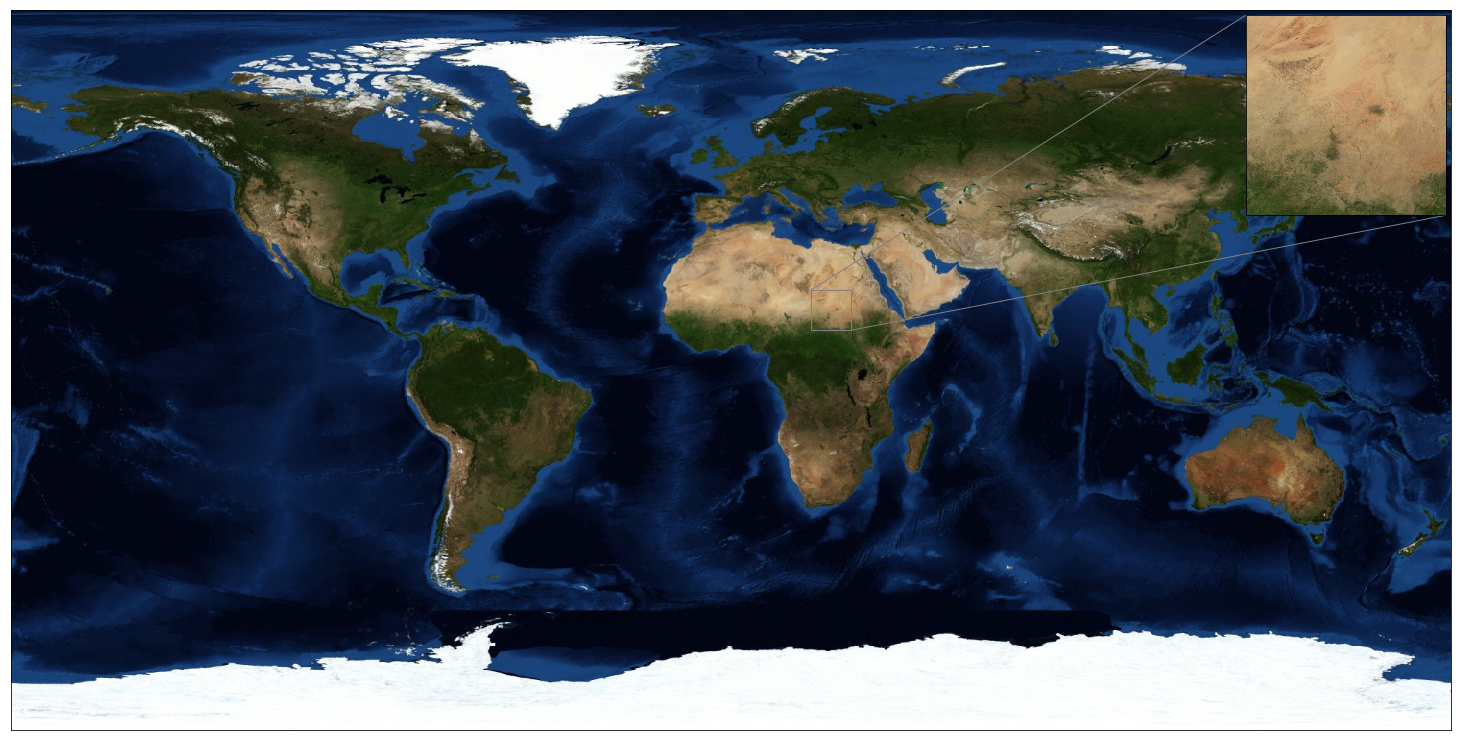

In [68]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import numpy as np

# fig = plt.figure()
# ax = fig.add_subplot(111)

ax,m = get_base_map()

# map.drawmapboundary(fill_color='#7777ff')
# map.fillcontinents(color='#ddaa66', lake_color='#7777ff', zorder=0)
# map.drawcoastlines()

# lons = np.array([-13.7, -10.8, -13.2, -96.8, -7.99, 7.5, -17.3, -3.7])
# lats = np.array([9.6, 6.3, 8.5, 32.7, 12.5, 8.9, 14.7, 40.39])
# cases = np.array([1971, 7069, 6073, 4, 6, 20, 1, 1])
# deaths = np.array([1192, 2964, 1250, 1, 5, 8, 0, 0])
# places = np.array(['Guinea', 'Liberia', 'Sierra Leone','United States', 'Mali', 'Nigeria', 'Senegal', 'Spain'])

# x, y = map(lons, lats)

# map.scatter(x, y, s=cases, c='r', alpha=0.5)

axins = zoomed_inset_axes(ax, 5, loc=1)
axins.set_xlim(-20, 0)
axins.set_ylim(3, 18)

plt.xticks(visible=True)
plt.yticks(visible=True)
map2 = Basemap(llcrnrlon=20,llcrnrlat=10,urcrnrlon=30,urcrnrlat=20,ellps='WGS84',ax=axins)
map2.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 1500, verbose= True)
# map2 = Basemap(llcrnrlon=-20,llcrnrlat=3,urcrnrlon=0,urcrnrlat=18, ax=axins)
# map2.drawmapboundary(fill_color='#7777ff')
# map2.fillcontinents(color='#ddaa66', lake_color='#7777ff', zorder=0)
# map2.drawcoastlines()
# map2.drawcountries()

# map2.scatter(x, y, s=cases/5., c='r', alpha=0.5)

mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
plt.savefig('t.jpg')
plt.show()

In [5]:
import os
import json
top_path='datas/datas_by_name'
datas=[]
# names=[]
for dirpath, dirname, filename in os.walk(top_path):
    if filename:
        for file in filename:
            datas.append(dirpath + '/' + file)
#                     names.append(name+'-'+str(year))
# print(len(datas))
# print(datas)
# print(names)
# datas/AL011853_UNNAMED_1.json
# img=plt.imread('images/hurricane.png')
# datas/datas_by_name/
fig=plt.figure(figsize=(20.0,10.0)) 
sum=0
# datas_in=[]
# for item in collection.find():
#     datas_in.append(item['path'])
#     sum+=item['count']
# datas_in=set(datas_in)
# datas=set(datas)

# datas_rest=datas-datas_in
# print(len(datas_rest))
for data_path in datas:
    file=data_path.split('/')[-1]
    name=file.split('_')[0]
    year=data_path[-9:-5]
    with open(data_path,'r',encoding='utf-8') as f:
        data=json.load(f)
        latitudes=data['Latitude']
        longitudes=data['Longitude']
        speeds=data["Maximum_sustained_wind"]
        count=data['recordCount']
        colors=[]
#         zooms=[]
        for i in range(count):
            col,zoom=from_speed_to_color(speeds[i])
            colors.append(col)
#             zooms.append(zoom)
        ax=fig.add_subplot(111)
        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())
        plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
        plt.margins(0,0)
        m = Basemap(ellps='WGS84')
        m.bluemarble()
        for i in range(count):
            
#             x_size, y_size = 9*zooms[i], 8*zooms[i]
#             x0, y0 = m(longitudes[i] - x_size/2., latitudes[i] - y_size/2.)
#             x1, y1 = m(longitudes[i] + x_size/2., latitudes[i] + y_size/2.) 
#             im = plt.imshow(img, extent=(x0, x1, y0, y1))  
            if i==0:
                m.plot(longitudes[0],latitudes[0],colors[0],marker='D',markersize=6)
            else:
                plt.annotate('',xy=(longitudes[i],latitudes[i]),  xycoords='data',
                xytext=(longitudes[i-1],latitudes[i-1]), textcoords='data',arrowprops=dict(arrowstyle="fancy",color=colors[i]))
        path='images/hurricanes/{}-{}.jpg'.format(name,year,i)
        plt.savefig(path)
        sum+=1
        print(path,sum)
        fig.clf()
        print(data_path)
#         collection.insert_one({'path':data_path,'count':count})
print('Done')

images/hurricanes/ALBERTO-2000.jpg 1
datas/datas_by_name/ALBERTO_2000.json
images/hurricanes/ALBERTO-2006.jpg 2
datas/datas_by_name/ALBERTO_2006.json
images/hurricanes/ALBERTO-2012.jpg 3
datas/datas_by_name/ALBERTO_2012.json
images/hurricanes/ALEX-2004.jpg 4
datas/datas_by_name/ALEX_2004.json
images/hurricanes/ALEX-2010.jpg 5
datas/datas_by_name/ALEX_2010.json
images/hurricanes/ALEX-2016.jpg 6
datas/datas_by_name/ALEX_2016.json
images/hurricanes/ALLISON-2001.jpg 7
datas/datas_by_name/ALLISON_2001.json
images/hurricanes/ALPHA-2005.jpg 8
datas/datas_by_name/ALPHA_2005.json
images/hurricanes/ANA-2003.jpg 9
datas/datas_by_name/ANA_2003.json
images/hurricanes/ANA-2009.jpg 10
datas/datas_by_name/ANA_2009.json
images/hurricanes/ANA-2015.jpg 11
datas/datas_by_name/ANA_2015.json
images/hurricanes/ANDREA-2007.jpg 12
datas/datas_by_name/ANDREA_2007.json
images/hurricanes/ANDREA-2013.jpg 13
datas/datas_by_name/ANDREA_2013.json
images/hurricanes/ARLENE-2005.jpg 14
datas/datas_by_name/ARLENE_2005.js

images/hurricanes/FRANKLIN-2011.jpg 114
datas/datas_by_name/FRANKLIN_2011.json
images/hurricanes/FRANKLIN-2017.jpg 115
datas/datas_by_name/FRANKLIN_2017.json
images/hurricanes/FRED-2009.jpg 116
datas/datas_by_name/FRED_2009.json
images/hurricanes/FRED-2015.jpg 117
datas/datas_by_name/FRED_2015.json
images/hurricanes/GABRIELLE-2001.jpg 118
datas/datas_by_name/GABRIELLE_2001.json
images/hurricanes/GABRIELLE-2007.jpg 119
datas/datas_by_name/GABRIELLE_2007.json
images/hurricanes/GABRIELLE-2013.jpg 120
datas/datas_by_name/GABRIELLE_2013.json
images/hurricanes/GAMMA-2005.jpg 121
datas/datas_by_name/GAMMA_2005.json
images/hurricanes/GASTON-2004.jpg 122
datas/datas_by_name/GASTON_2004.json
images/hurricanes/GASTON-2010.jpg 123
datas/datas_by_name/GASTON_2010.json
images/hurricanes/GASTON-2016.jpg 124
datas/datas_by_name/GASTON_2016.json
images/hurricanes/GERT-2005.jpg 125
datas/datas_by_name/GERT_2005.json
images/hurricanes/GERT-2011.jpg 126
datas/datas_by_name/GERT_2011.json
images/hurricanes

images/hurricanes/MICHAEL-2000.jpg 225
datas/datas_by_name/MICHAEL_2000.json
images/hurricanes/MICHAEL-2012.jpg 226
datas/datas_by_name/MICHAEL_2012.json
images/hurricanes/MICHELLE-2001.jpg 227
datas/datas_by_name/MICHELLE_2001.json
images/hurricanes/MINDY-2003.jpg 228
datas/datas_by_name/MINDY_2003.json
images/hurricanes/NADINE-2000.jpg 229
datas/datas_by_name/NADINE_2000.json
images/hurricanes/NADINE-2012.jpg 230
datas/datas_by_name/NADINE_2012.json
images/hurricanes/NANA-2008.jpg 231
datas/datas_by_name/NANA_2008.json
images/hurricanes/NATE-2005.jpg 232
datas/datas_by_name/NATE_2005.json
images/hurricanes/NATE-2011.jpg 233
datas/datas_by_name/NATE_2011.json
images/hurricanes/NATE-2017.jpg 234
datas/datas_by_name/NATE_2017.json
images/hurricanes/NICHOLAS-2003.jpg 235
datas/datas_by_name/NICHOLAS_2003.json
images/hurricanes/NICOLE-2004.jpg 236
datas/datas_by_name/NICOLE_2004.json
images/hurricanes/NICOLE-2010.jpg 237
datas/datas_by_name/NICOLE_2010.json
images/hurricanes/NICOLE-2016.j

<Figure size 1440x720 with 0 Axes>

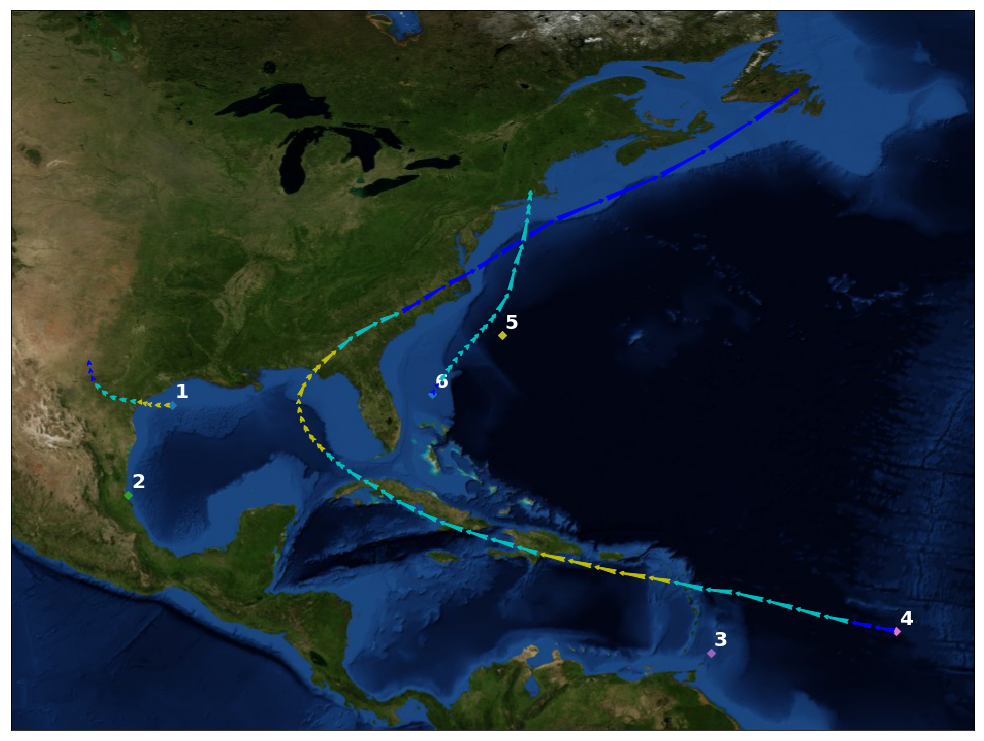

In [4]:
import os
import json
data_path='datas/datas_by_year/'
# data_paths_dicts={}
# for i in range(1851,2018):
#     data_paths_dicts[str(i)]=[]
data_paths=[]
count=0
for dirpath, dirname, filename in os.walk(data_path):
    if filename:
        for file in filename:
            file_year=file[0:4]
#             print(file_year)
            if(int(file_year)==1851):
                count+=1
                data_paths.append(dirpath + '/' + file)
                if(count==6):
                    break
                
# print(data_paths_dicts['1851'])
# datas=[]
# for i in range(1851,2018):
data_of_year=[]
#     path_of_year=data_paths_dicts[str(i)]
min_latitudes=[]
max_latitudes=[]
min_longitudes=[]
max_longitudes=[]
for data_path in data_paths:
    with open(data_path,'r',encoding='utf-8') as f:
        data=json.load(f)
        min_latitudes.append(min(data['Latitude']))
        max_latitudes.append(max(data['Latitude']))
        min_longitudes.append(min(data['Longitude']))
        max_longitudes.append(max(data['Longitude']))
        data_of_year.append(data)
min_latitude=min(min_latitudes)-5
if min_latitude<-90:
    min_latitude=-90
max_latitude=max(max_latitudes)+5
if max_latitude>90:
    max_latitude=90
min_longitude=min(min_longitudes)-5
if min_longitude<-180:
    min_longitude=-180
max_longitude=max(max_longitudes)+5
if max_longitude>180:
    max_longitude=180
#     datas.append(data_of_year)
#     print(min_latitude,max_latitude,min_longitude,max_longitude)
fig=plt.figure(figsize=(20.0,10.0))
ax,m=get_base_map(fig,min_longitude,min_latitude,max_longitude,max_latitude)
count=0
for data in data_of_year:
    count+=1
    latitudes=data['Latitude']
    longitudes=data['Longitude']
    speeds=data["Maximum_sustained_wind"]
    colors=[from_speed_to_color(i) for i in speeds]
    m.plot(longitudes[0],latitudes[0],colors[0],marker='D',markersize=6)
    plt.text(longitudes[0]+0.2, latitudes[0]+0.2, '{}'.format(count),fontsize=20,fontweight='bold',ha='left',va='bottom',color='w')
    for j in range(len(latitudes)-1):
#             m.plot(longitudes[i],latitudes[i],colors[i],marker='o',markersize=8
#             col=colors[i]
        plt.annotate('',xy=(longitudes[j+1],latitudes[j+1]),  xycoords='data',
            xytext=(longitudes[j],latitudes[j]), textcoords='data',
            arrowprops=dict(arrowstyle="fancy",color=colors[j][0])
            )
plt.savefig('images/pics_of_year/1851bak.jpg')
plt.show()
plt.close()